# Transform radar data based on Babel gitlab project 

babel/learning/segmentation/segmentation_using_masks.py

In [ ]:
import numpy as np
import os
import re
import zipfile
from google.colab import drive
import matplotlib.pyplot as plt
from PIL import Image
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
#Global variables

PATH_ZIP= '/content/drive/My Drive/PROJET F4 ZZ3 HAMZA/Data.zip'

# Concatenation des path de traj1 et traj3

PATH_DATA_TXT = '/content/targetdir/train_paths.txt'

In [ ]:
# Extract zip file
with zipfile.ZipFile(PATH_ZIP,"r") as zip_ref:
    zip_ref.extractall("targetdir")

In [ ]:
# Read in the file
with open('/content/targetdir/train_paths.txt', 'r') as file :
    filedata = file.read()

    # Replace the target string
    filedata = filedata.replace('traj1_masks', 'traj1_masks_noury')
    filedata = filedata.replace('traj3_masks', 'traj3_masks_coly')
    filedata = filedata.replace('/Volumes/Untitled/data/', '')
# Write the file out again
with open('/content/targetdir/train_paths.txt', 'w') as file:
  file.write(filedata)


In [ ]:
with open(PATH_DATA_TXT, "r") as f:
    lines = f.readlines()

    # loading paths
    radar_scan_paths = [l.split()[0] for l in lines]
    annotation_paths = [l.split()[1] for l in lines]
    print(radar_scan_paths)
    print(annotation_paths)
    # loading paths
    radar_scan_paths = [
        p
        for i, p in enumerate(radar_scan_paths)
        if os.path.exists('/content/targetdir/'+radar_scan_paths[i])
        and os.path.exists('/content/targetdir/'+annotation_paths[i])
    ]
    annotation_paths = [
        p
        for i, p in enumerate(annotation_paths)
        if os.path.exists('/content/targetdir/'+radar_scan_paths[i])
        and os.path.exists('/content/targetdir/'+annotation_paths[i])
    ]

In [ ]:
l_radar_scan = []
l_radar_annotation = []
for i in range(len(radar_scan_paths)):
    radar_scan = np.load('/content/targetdir/'+radar_scan_paths[i], allow_pickle=True)["scan"]
    l_radar_scan.append(radar_scan)
    radar_annotation = np.load('/content/targetdir/'+annotation_paths[i])["arr_0"]
    l_radar_annotation.append(radar_annotation)

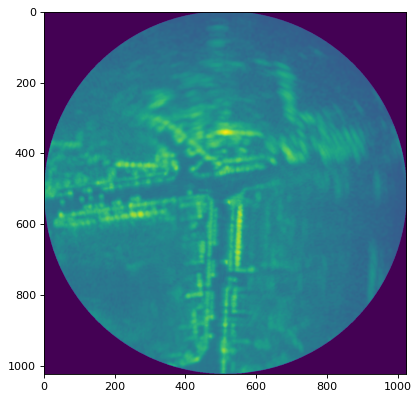

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)

#subplot(r,c) provide the no. of rows and columns
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
#plt.imshow(l_radar_annotation[230])
plt.imshow(np.rot90(l_radar_scan[157]))

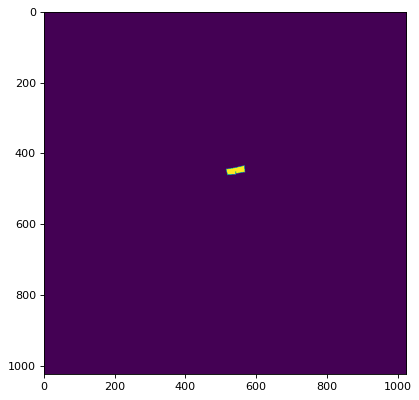

In [ ]:
plt.figure(figsize=(8, 6), dpi=80)
plt.imshow(l_radar_annotation[157])

In [ ]:
# Save data into npy array

for i in range(len(l_radar_scan)):
    np.save('/content/drive/My Drive/PROJET F4 ZZ3 HAMZA/Data_npy/X/'+'scan_'+str(i)+'.npy', np.rot90(l_radar_scan[i]))
    np.save('/content/drive/My Drive/PROJET F4 ZZ3 HAMZA/Data_npy/Y/'+'annoted_'+str(i)+'.npy', l_radar_annotation[i])